# Convex and Non-Convex Optimisation

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import seaborn as sns

## Generate Data

In [2]:
price = np.random.randint(1000,7000, size=1000)
volume = ((-price/2)+4000).astype('int')
cost = 300+volume*0.25
profit = (price - cost)*volume
df_pv = pd.DataFrame({'price':price,
                     'volume':volume,
                     'cost':cost,
                     'profit':profit}) 
df_pv= df_pv.sort_values(by='price').reset_index(drop=True)

In [15]:
df_pv.describe()

price       volume         cost        profit
count  1000.00000  1000.000000  1000.000000  1.000000e+03
mean   3974.89800  2012.298000   803.074500  4.604756e+06
std    1778.73159   889.362166   222.340541  2.014444e+06
min    1001.00000   505.000000   426.250000 -6.079512e+05
25%    2364.00000  1260.750000   615.187500  3.597185e+06
50%    4039.00000  1980.500000   795.125000  5.262400e+06
75%    5478.25000  2818.000000  1004.500000  6.288288e+06
max    6989.00000  3499.000000  1174.750000  6.587700e+06

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28664310>]],
      dtype=object)

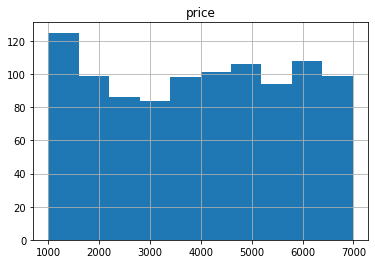

In [188]:
df_pv[['price']].hist()
# plt.title('Histogram')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a289fa590>]],
      dtype=object)

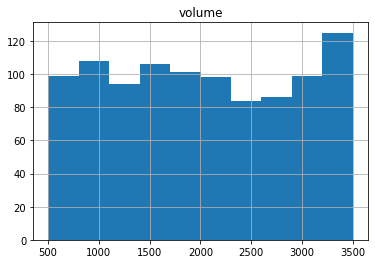

In [189]:
df_pv[['volume']].hist()

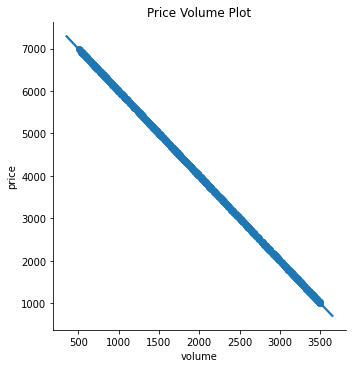

In [95]:
sns.lmplot(x='volume',y='price', data=df_pv).set(title="Price Volume Plot")


In [220]:
import plotly.graph_objects as go
import numpy as np
import chart_studio.plotly as py
from plotly.offline import iplot

# Read data 
z_data = df_pv[['price','volume','profit']]

fig = go.Figure(data=[go.Mesh3d(x=(z_data['price'].values),
                               y=(z_data['volume'].values),
                               z=(z_data['profit'].values),
                   opacity=0.5,
                   color='rgba(244,30,20,0.6)'
                  )])
fig.update_layout(title='Price Volume - Profit Curve', autosize=True)


iplot(fig)

## Convex Optimisation

In [185]:
import numpy as np
from scipy import optimize
import statsmodels.api as sm


In [152]:
# take a sample data , i.e. price <3000. Let this be the historric data avaialable for the analysis
df_pv_small=df_pv[df_pv['price']<3000]
df_pv_small.tail()

price  volume    cost      profit
337   2972    2514  928.50  5137359.00
338   2974    2513  928.25  5140969.75
339   2977    2511  927.75  5145666.75
340   2982    2509  927.25  5155367.75
341   2982    2509  927.25  5155367.75

#### Model - Volume

In [203]:
X= df_pv_small[['price']]
y=df_pv_small[['volume']]
X = sm.add_constant(X)

mod_vol = sm.OLS(y,X)
mod_vol = mod_vol.fit()
mod_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.792e+08
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:12:33   Log-Likelihood:                -9.8485
No. Observations:                 342   AIC:                             23.70
Df Residuals:                     340   BIC:                             31.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3999.6759      0.046   8.74e+04      0.000    3999.586    3999.766
price         -0.5000   2.28e-05  -2.19e+04      0.000      -0.500      -0.500
==============================================================================
Omnibus:                     1573.389   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.457
Skew:                           0.057   Prob(JB):                     9.07e-13
Kurtosis:                       1.031   Cond. No.                     6.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model - Costs

In [204]:
X= df_pv_small[['volume']]
y=df_pv_small[['cost']]
X = sm.add_constant(X)

mod_cost = sm.OLS(y,X)
mod_cost = mod_cost.fit()
mod_cost.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.343e+29
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:12:35   Log-Likelihood:                 8671.3
No. Observations:                 342   AIC:                        -1.734e+04
Df Residuals:                     340   BIC:                        -1.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.0000   1.32e-12   2.27e+14      0.000     300.000     300.000
volume         0.2500   4.32e-16   5.78e+14      0.000       0.250       0.250
==============================================================================
Omnibus:                       29.842   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.609
Skew:                          -0.779   Prob(JB):                     1.85e-08
Kurtosis:                       2.734   Cond. No.                     3.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
mod_cost.predict(X.iloc[:1,:].values)

array([1174.75])

##### Helper Functions

In [290]:
from scipy import optimize

def cal_profit(price):
    volume = mod_vol.predict([1, price])   
    cost = mod_cost.predict([1, volume])
    profit = (price - cost)*volume
    print(f'volume:{volume}')
    return profit

###### The main objective function for the minimisation.
def objective(price):
    return -cal_profit(price)


####################  Constraints ####################
# Left-sided inequality from the first constraint
def constraint1(price):
    return 3000-mod_vol.predict([1, price])

####################  bounds ####################
bounds=([1000,10000])

##### Optimisation initialisation

In [207]:
initial = [2000]

# Construct dictionaries
con1 = {'type':'ineq','fun':constraint1}

# Put those dictionaries into a tuple
cons = (con1)

In [208]:
result =  optimize.minimize(fun=objective, 
                            x0=initial,
                            method='SLSQP',
                            constraints=cons,
                            options={'maxiter':100, 'disp': True})


volume:[array([2999.74566463])]
volume:[array([2999.74566463])]
volume:[array([2999.74566463])]
volume:[array([1550.01870686])]
volume:[array([1550.01870686])]
volume:[array([1550.01870685])]
volume:[array([1710.94360777])]
volume:[array([1710.94360777])]
volume:[array([1710.94360776])]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6587215.163007045
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3


In [219]:
print(f'Price for max profit:{result.x[0]}')
print(f'Volume for max profit:{mod_vol.predict([1, 4577.78398832])[0]}')

Price for max profit:4577.783988323354
Volume for max profit:1710.9436077736068


### Non Convex Optimisation

In [268]:
price = np.random.randint(1000,8000, size=1000)
volume = ((-price/3)+4000).astype('int')
cost = 300+volume*0.25
profit = (price - cost)*volume
df_pv2 = pd.DataFrame({'price':price,
                     'volume':volume,
                     'cost':cost,
                     'profit':profit}) 
df_pv2= df_pv2.sort_values(by='price').reset_index(drop=True)

In [269]:
df_pv2['profit'].max()

10530000.0

In [271]:
# Read data 
z_data1 = df_pv[['price','volume','profit']]

z_data2 = df_pv2[['price','volume','profit']]

fig = go.Figure(data=[
                    go.Mesh3d(x=(z_data['price'].values),
                               y=(z_data['volume'].values),
                               z=(z_data['profit'].values),
                   opacity=0.5,
                   color='rgba(244,30,20,0.6)'),
                      go.Mesh3d(x=(z_data2['price'].values),
                               y=(z_data2['volume'].values),
                               z=(z_data2['profit'].values),
                   opacity=0.5,
                   color='rgba(200,100,20,1)')
                     ])
fig.update_layout(title='Price Volume - Profit Curve 2', autosize=True)


iplot(fig)

In [335]:
df_pv['product']=0
df_pv2['product']=1
df_pv_non_convex = df_pv.append(df_pv2)
df_pv_non_convex.head()

price  volume     cost     profit  product
0   1001    3499  1174.75 -607951.25        0
1   1001    3499  1174.75 -607951.25        0
2   1014    3493  1173.25 -556260.25        0
3   1015    3492  1173.00 -551736.00        0
4   1017    3491  1172.75 -543723.25        0

In [336]:
df_pv_non_convex.tail()

price  volume    cost      profit  product
995   7977    1341  635.25  9845286.75        1
996   7978    1340  635.00  9839620.00        1
997   7982    1339  634.75  9837967.75        1
998   7991    1336  634.00  9828952.00        1
999   7999    1333  633.25  9818544.75        1

#### volume model

In [337]:
X= df_pv_non_convex[['price','product']]
y=df_pv_non_convex[['volume']]
X = sm.add_constant(X)

mod_vol2 = sm.OLS(y,X)
mod_vol2 = mod_vol2.fit()
mod_vol2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 2.660e+04
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:36:11   Log-Likelihood:                -12964.
No. Observations:                2000   AIC:                         2.593e+04
Df Residuals:                    1997   BIC:                         2.595e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3622.5384      8.884    407.783      0.000    3605.116    3639.960
price         -0.4051      0.002   -219.361      0.000      -0.409      -0.401
product      696.4254      7.130     97.681      0.000     682.443     710.408
==============================================================================
Omnibus:                     1492.956   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.594
Skew:                           0.031   Prob(JB):                     1.77e-26
Kurtosis:                       1.809   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### cost model

In [338]:
X= df_pv_non_convex[['volume','product']]
y=df_pv_non_convex[['cost']]
X = sm.add_constant(X)

mod_cost2 = sm.OLS(y,X)
mod_cost2 = mod_cost2.fit()
mod_cost2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.311e+32
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:36:11   Log-Likelihood:                 53536.
No. Observations:                2000   AIC:                        -1.071e+05
Df Residuals:                    1997   BIC:                        -1.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.0000   3.73e-14   8.04e+15      0.000     300.000     300.000
volume         0.2500   1.62e-17   1.54e+16      0.000       0.250       0.250
product     -3.89e-13   2.69e-14    -14.442      0.000   -4.42e-13   -3.36e-13
==============================================================================
Omnibus:                      110.810   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.552
Skew:                          -0.009   Prob(JB):                     5.75e-10
Kurtosis:                       2.286   Cond. No.                     7.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Non Convex Optimisation 
#### Minimisation using convex optimisation for non convex loss surface results in local optimisation rather than global optimisation. Hence in order to overcome this limitation  we will use basin hopping algorith. This will help find the global minimum rather than getting stuck in local minimum

In [339]:
def cal_profit(price, product):
    product=np.round(product)
    volume = mod_vol2.predict([1, price, product])   
    cost = mod_cost2.predict([1, volume, product])
    profit = (price - cost)*volume
    return profit

###### The main objective function for the minimisation.
def objective(in_arr):
    price, product = in_arr[0], in_arr[1]
    return -cal_profit(price, product)


####################  Constraints ####################
# Left-sided inequality from the first constraint
def constraint1(in_arr):
    price, product = in_arr[0], in_arr[1]
    product=np.round(product)
    return 3000-mod_vol2.predict([1, price, product])

# 2000 is the inital price and 0 is the initial product code
initial_2=([2000,0])

#  bounds for each of the inital vairables
bounds=([1000,10000],[0,1])

# Construct dictionaries
con1 = {'type':'ineq','fun':constraint1}

# Put those dictionaries into a tuple
cons = (con1)

result =  optimize.minimize(fun=objective, 
                            x0=initial_2,
                            method='SLSQP',
                            constraints=cons,
                            options={'maxiter':100, 'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -6868555.373913075
            Iterations: 4
            Function evaluations: 30
            Gradient evaluations: 4


In [347]:
print(f'Optimised price: {int(result.x[0])}')
print(f'Product type: {int(result.x[1])}')

Optimised price: 5018
Product type: 0


#### Basin Hopping algorithm

In [349]:
from scipy.optimize import basinhopping
minimizer_kwargs = {"method": "SLSQP","constraints":cons, "bounds":bounds}
ret = basinhopping(func=objective, 
                   x0=initial_2, 
                   minimizer_kwargs=minimizer_kwargs,
                   niter=100)

In [351]:
ret

                        fun: -9872947.512092032
 lowest_optimization_result:      fun: -9872947.512092032
     jac: array([0.125, 0.   ])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([5.95713780e+03, 7.53128711e-01])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1633
                        nit: 100
                       njev: 259
                          x: array([5.95713780e+03, 7.53128711e-01])

In [352]:
print(f'Optimised price: {int(ret.x[0])}')
print(f'Product type: {int(ret.x[1])}')

Optimised price: 5957
Product type: 0
